In [4]:
#imports
import tensorflow as ts
import keras as ks
import matplotlib.pyplot as plt
import numpy as np
import time
import random

from numpy.random import seed
from random import randint
from keras.datasets import mnist
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.models import Model, Input
from keras.utils import to_categorical,np_utils
from keras.layers.advanced_activations import LeakyReLU

def done():
    print("DONE")
def nl():
    print("")
    
done()

DONE


In [5]:

#magic numbers
seed(42)
nr_classes=10
nr_neurons_in_layer=10
my_optimizer=Adam()
my_batch_size=128
pixels_ox=28
pixels_oy=28
my_epochs=10

#want_to_train=False

done()

DONE


path: f:\stuff\anaconda2\envs\tensorflow\lib\site-packages\keras\datasets\mnist.py

shape of training input: (60000, 28, 28)
shape of training output: (60000,)
shape of test input: (10000, 28, 28)
shape of training output: (10000,)

DONE


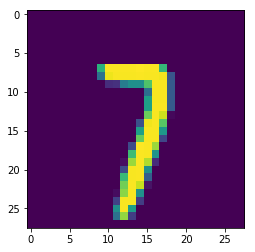

In [6]:
#loading the data set and veifying shape
print("path:",mnist.__file__)
nl()
(input_train,output_train),(input_test,output_test)=mnist.load_data()
print("shape of training input:",input_train.shape)
print("shape of training output:",output_train.shape)
print("shape of test input:",input_test.shape)
print("shape of training output:",output_test.shape)
nl()

pick_a_random_input=randint(0,len(input_train))
plt.imshow(input_train[pick_a_random_input])


done()

In [7]:
#RESHAPING

#difference between the two?

#MODEL BASED 
reshaped=28*28
input_train = np.reshape(input_train, (input_train.shape[0],reshaped))
input_test = np.reshape(input_test, (input_test.shape[0],reshaped))

#FUNCTIONAL
#input_train = np.reshape(input_train, (-1,pixels_ox, pixels_oy,1))
#input_test = np.reshape(input_test, (-1,pixels_ox, pixels_oy, 1))

#input_train = np.reshape(input_train, (-1,pixels_ox, pixels_oy))
#input_test = np.reshape(input_test, (-1,pixels_ox, pixels_oy))

print("reshaped input_train:",input_train.shape)
print("reshaped input_test:",input_test.shape)

reshaped input_train: (60000, 784)
reshaped input_test: (10000, 784)


In [8]:

#ENSURING FLOAT

input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

done()

DONE


In [9]:
#NORMALIZING DATA
input_train=input_train/255
input_test=input_test/255
done()

DONE


In [10]:
#ONEHOT ENCODING
choose_random_output=randint(0,len(output_train)-1)
print("before onehot enconding:",output_train[choose_random_output])
output_train_encoded=to_categorical(output_train,nr_classes)
output_test_encoded=to_categorical(output_test,nr_classes)
print("after onehot encoding:",output_train_encoded[choose_random_output])
done()

before onehot enconding: 5
after onehot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
DONE


In [14]:
reshaped=28*28
nr_neurons_in_layer=16
nr_classes=10

#DEFINING MODEL
def my_model(x):
    x=Dense(nr_neurons_in_layer)(x)
    x=Dense(nr_neurons_in_layer)(x)
    x=Dense(nr_classes)(x)
    x=LeakyReLU(alpha=0.1)(x)
    return x

my_inputs=Input((reshaped,))
my_outputs=my_model(my_inputs)

model = Model(inputs=my_inputs,outputs=my_outputs)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                170       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
